In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.stats import chisquare
from scipy.stats import probplot
sns.set_style('white')

#df_1 = pd.read_table('data.1.table.txt')
#df_2 = pd.read_table('data.2.table.txt')
#df_3 = pd.read_table('data.3.table.txt')
#df_4 = pd.read_table('data.4.table.txt')
df_5 = pd.read_table('data.5.table.txt')
#df_6 = pd.read_table('data.6.table.txt')

In all 6 data tables, there are 150 individuals. Data table 1-3 have 178621 variants, data table 4-6 have 28746 variants.

### Allele frequency estimates
1. Estimate the allele frequency for each variant
2. Plot the distribution (histogram) of the allele frequency
3. Discuss your thoughts of the allele frequency pattern regarding genetic association studies.

**Answer**

**1&2.**

All 6 plots (Figure 1-6) show similar patterns of allele frequencies. I also plotted historgam of cases and controls of data.1.txt seperately. However, I didn't observe obvious differences of allele frequencies distribution between cases and controls.

**3.**

In all six datasets, there are a lot variants with low minor allele frequencies (the bin near 1 is very high). Because we only have 150 individuals, some of the monomorphic alleles in our datasets may actually be polymorphic in the population. In general, we observe a lot of low frequency alleles in these six datasets and a substantial number of common variants (allele frequency > 0.05) as well. 

<img src="https://github.com/lingchen42/HGEN_proj/blob/master/journal.pcbi.1002822.g001.png?raw=true">

Bush, William S., and Jason H. Moore. "Genome-wide association studies." PLoS Comput Biol 8.12 (2012): e1002822.

As shown in the above figure. The alleles with large effects, no matter common or rare, are easy to identify.  Most genome wide association studies identify common variants with small effect sizes. It is hard to identify rare variants with small effects in genetic association studies. Obtaining enough power in genetic association studies for identifying rare variants requires huge sample size of cases and controls.

Based on the allele frequency pattern in these 6 datasets and the sample size, we may be able to perform the genetic association studies for common variants (allele frequency > 0.05).

** class notes **
Because the allele frequency is low, so large sample is required for GWAS and even larger for sequencing studies of rare variants.  

In [3]:
def cal_allelefreq(df):
    afs_0 = []
    afs_minor = []
    genotypes_00 = []
    genotypes_01 = []
    genotypes_11 = []
    
    variants = df.columns[2:]
    for variant in variants:
        df_genotypes = df[variant].value_counts()
        
        try:
            genotype_00 = df_genotypes['0/0']
        except KeyError:
            genotype_00 = 0
            
        try:
            genotype_01 = df_genotypes['0/1']
        except KeyError:
            genotype_01 = 0
            
        try:
            genotype_11 = df_genotypes['1/1']
        except KeyError:
            genotype_11 = 0
        
        total = float(2*(genotype_00+genotype_01+genotype_11))
        af_0 = (2*genotype_00 + genotype_01)/total
        af_1 = 1 - af_0
        
        afs_0.append(af_0)
        afs_minor.append(min(af_0,af_1))
        genotypes_00.append(genotype_00)
        genotypes_01.append(genotype_01)
        genotypes_11.append(genotype_11)
        
    allele_summary = pd.DataFrame(data={'Variants': variants, 'Frequency of 0 allele': afs_0, 'Frequency of minor allele': afs_minor, 'Frequency of genotype 0/0': genotypes_00, 'Frequency of genotype 0/1': genotypes_01,'Frequency of genotype 1/1':genotypes_11})
        
    return allele_summary

def af_hist(allele_summary):
    
    include_fixed = allele_summary['Frequency of 0 allele']
    exclude_fixed = [i for i in allele_summary['Frequency of 0 allele'] if (i!=1)&(i!=0)]

    af_fig = plt.figure(figsize=(10,4))
    ax1 = af_fig.add_subplot(121) 
    sns.distplot(exclude_fixed, kde=False, ax=ax1)
    ax1.set_xlim(0,1)
    ax1.set_title('Allele Frequency Distribution')
    ax1.set_xlabel('The Frequency of Polymorphic Alleles')

    ax2 = af_fig.add_subplot(122) 
    sns.distplot(include_fixed, kde=False, ax=ax2)
    ax2.set_xlim(0,1)
    ax2.set_title('Allele Frequency Distribution')
    ax2.set_xlabel('The Frequency of All Alleles')

    plt.show()
    
    return af_fig
    

In [28]:
# Plot allele frequency distribution
allele_summary_1 = cal_allelefreq(df_1)
allele_summary_2 = cal_allelefreq(df_2)
allele_summary_3 = cal_allelefreq(df_3)
allele_summary_4 = cal_allelefreq(df_4)
allele_summary_5 = cal_allelefreq(df_5)
allele_summary_6 = cal_allelefreq(df_6)

**data 1**

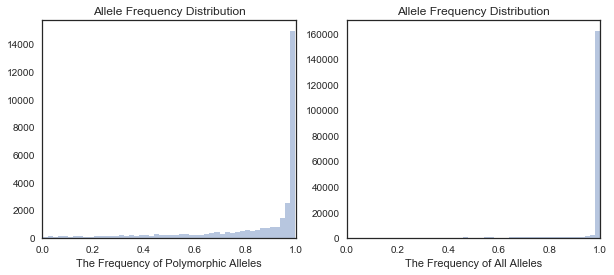

In [7]:
af_fig = af_hist(allele_summary_1)

<h4 align="center">Figure 1 The allele frequency distribution of data 1.</h4> 

**data 2**

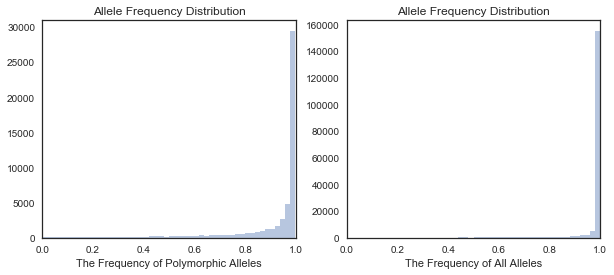

In [10]:
af_fig = af_hist(allele_summary_2)

<h4 align="center">Figure 2 The allele frequency distribution of data 2.</h4> 

**data 3**

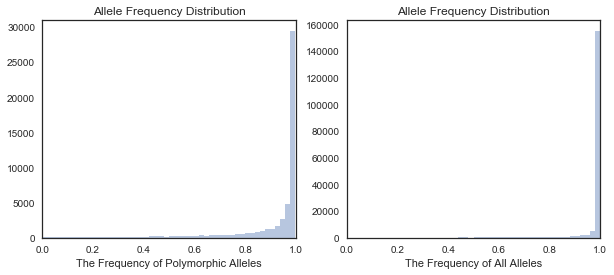

In [11]:
af_fig = af_hist(allele_summary_3)

<h4 align="center">Figure 3 The allele frequency distribution of data 3.</h4> 

**data 4**

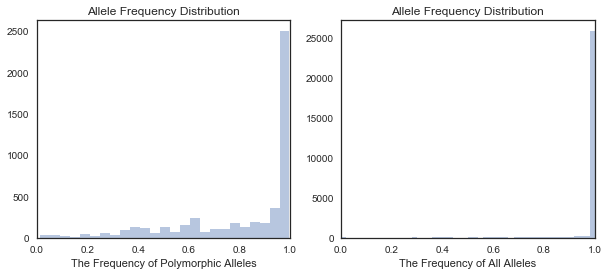

In [12]:
af_fig = af_hist(allele_summary_4)

<h4 align="center">Figure 4 The allele frequency distribution of data 4.</h4> 

**data 5**

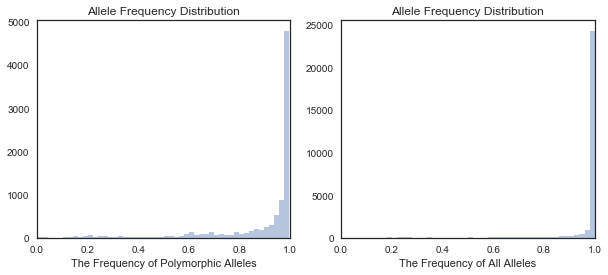

In [205]:
af_fig = af_hist(allele_summary_5)

<h4 align="center">Figure 5 The allele frequency distribution of data 5.</h4> 

**data 6**

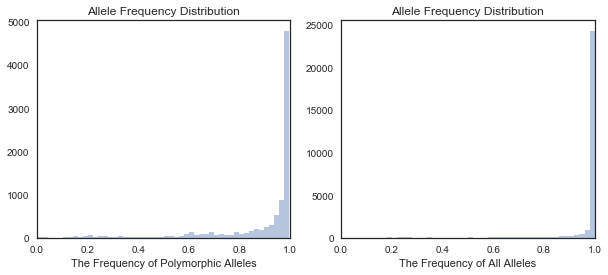

In [14]:
af_fig = af_hist(allele_summary_6)

<h4 align="center">Figure 6 The allele frequency distribution of data 6.</h4> 

In [35]:
# Plot allele frequency distribution of the controls and cases
df_1_control = df_1[df_1['status']=='control']
df_1_case = df_1[df_1['status']=='case']

df_2_control = df_2[df_2['status']=='control']
df_2_case = df_2[df_2['status']=='case']

df_3_control = df_3[df_3['status']=='control']
df_3_case = df_3[df_3['status']=='case']

df_4_control = df_4[df_4['status']=='control']
df_4_case = df_4[df_4['status']=='case']

df_5_control = df_5[df_5['status']=='control']
df_5_case = df_5[df_5['status']=='case']

df_6_control = df_6[df_6['status']=='control']
df_6_case = df_6[df_6['status']=='case']

allele_summary_1_control= cal_allelefreq(df_1_control)
allele_summary_1_case= cal_allelefreq(df_1_case)

allele_summary_2_control= cal_allelefreq(df_2_control)
allele_summary_2_case= cal_allelefreq(df_2_case)

allele_summary_3_control= cal_allelefreq(df_3_control)
allele_summary_3_case= cal_allelefreq(df_3_case)

allele_summary_4_control= cal_allelefreq(df_4_control)
allele_summary_4_case= cal_allelefreq(df_4_case)

allele_summary_5_control= cal_allelefreq(df_5_control)
allele_summary_5_case= cal_allelefreq(df_5_case)

allele_summary_6_control= cal_allelefreq(df_6_control)
allele_summary_6_case= cal_allelefreq(df_6_case)

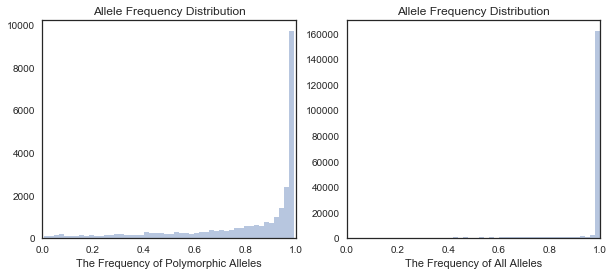

In [37]:
af_fig = af_hist(allele_summary_1_case)

<h4 align="center">Figure 7 The allele frequency distribution of cases of data 1.</h4> 

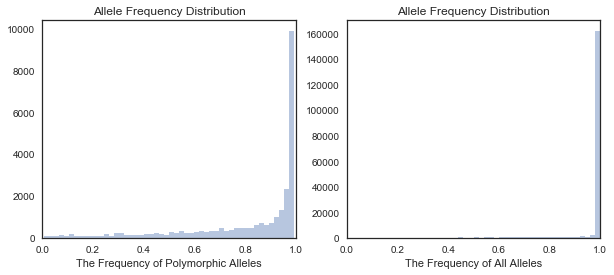

In [36]:
af_fig = af_hist(allele_summary_1_control)

<h4 align="center">Figure 8 The allele frequency distribution of controls of data 1.</h4> 

### Hardy-Weinberg Equilibrium
1. Calculate the p value of HWE for each variant
2. Plot the distribution of the p values and QQ plot of the p values (log scale)
3. Discuss the HWE patterns observed in the datasets.

**Answer**

**1&2.**

I plot the distribution of the p values and QQ plots of all six tables. (Figure 9-14 )

**3.**

In dataset 2, 3, 5and 6, there is a substantial amount of variants significantly differ from Hardy-Weinberg equilibrium. This can be seen from either the histrogram of HWE p values (a higher bin near 0) or from the qq plot (significantly differ from the diagonal). This can indicate that (i) there is a subpopulation structure in these 3 dataset or (ii) there are disease associated alleles or (iii) genotying error. The first is most likely to be the main driving force for the deviated HWE pvalue distribution of these 3 dataset. And indeed, as we see in the PCA plots, there are subpopulation structures in dataset 2, 3, 5 and 6. 

In dataset 1, there are also lots of variants significantly differ from Hardy-Weinberg equilibrium. However, as seen later on with PCA plot, dataset 1 doesn't have subpopulations. Therefore, this could indicate either (i) disease associated alleles or (ii) genotying error.

In dataset 4, there are fewer variants significanly differ from Hardy-Weinberg equilibrium. There are some variants in these 3 datasets that are significantly different from HWE equilibrium, it may cause by (i) disease associated alleles or (ii)genotying error. 

**class notes**

In [2]:
def hwe_p(row):
    observed_genotypes = [row['Frequency of genotype 0/0'], row['Frequency of genotype 0/1'], row['Frequency of genotype 1/1']]
    total = sum(observed_genotypes)
    af_0 = row['Frequency of 0 allele']
    expected_genotypes = [total*af_0**2, total*2*af_0*(1-af_0), total*(1-af_0)**2]
    
    statistic , p = chisquare(observed_genotypes, expected_genotypes, ddof=1)

    return p

def hwe(allele_summary):
    
    allele_summary['HWE p value'] = allele_summary.apply(hwe_p, axis=1)
    observed_data = list(allele_summary['HWE p value'].dropna())
    log_observed_data = -np.log(observed_data)
    hwe_fig = plt.figure(figsize=(8,8))  

    # Histogram of observed p-values

    ax1 = hwe_fig.add_subplot(221)
    sns.distplot(observed_data, bins=50, kde=False, ax=ax1)
    ax1.set_xlim(0,1)
    ax1.set_title('HWE p value distribution')
    ax1.set_xlabel('The p-value of Polymorphic Alleles')

    # QQ-plot
    ax2 = hwe_fig.add_subplot(222)
    probplot(log_observed_data, dist='expon', fit=False, plot=ax2)
    ax2.set_xlabel('Expected -ln(p)')
    ax2.set_ylabel('Observed -ln(p)')
    ax2.set_title('QQ plot')
    ax2.set_ylim(0,)
    ax2.set_aspect('equal')
    lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),
    np.max([ax2.get_xlim(), ax2.get_ylim()])]
    ax2.plot(lims, lims, '--', color='grey')
    ax2.set_xlim(lims)
    ax2.set_ylim(lims)

    # Histogram of observed p-values exluding those have allele frequencies ~ (0.02,0.98)
    allele_summary_common = allele_summary[(allele_summary['Frequency of 0 allele'] > 0.02) & (allele_summary['Frequency of 0 allele'] < 0.98)] 
    observed_data_common = list(allele_summary_common['HWE p value'].dropna())
    log_observed_data_common = -np.log(observed_data_common)

    ax3 = hwe_fig.add_subplot(223)
    sns.distplot(observed_data_common, bins=50, kde=False, ax=ax3)
    ax3.set_xlim(0,1)
    ax3.set_title('HWE p value distribution of common alleles')
    ax3.set_xlabel('The p-value of common Polymorphic Alleles')


    # QQ-plot: allele frequencies ~ (0.02,0.98)
    ax4 = hwe_fig.add_subplot(224)
    probplot(log_observed_data_common, dist='expon',plot=ax4)
    ax4.set_xlabel('Expected -ln(p)')
    ax4.set_ylabel('Observed -ln(p)')
    ax4.set_title('QQ plot (common variants)')
    ax4.set_ylim(0,)
    ax4.set_aspect('equal')
    lims = [np.min([ax4.get_xlim(), ax4.get_ylim()]),
    np.max([ax4.get_xlim(), ax4.get_ylim()])]
    ax4.plot(lims, lims, '--', color='grey')
    ax4.set_xlim(lims)
    ax4.set_ylim(lims) 
  
    plt.tight_layout()
    plt.show()
    
    return allele_summary, allele_summary_common, hwe_fig

**data 1**

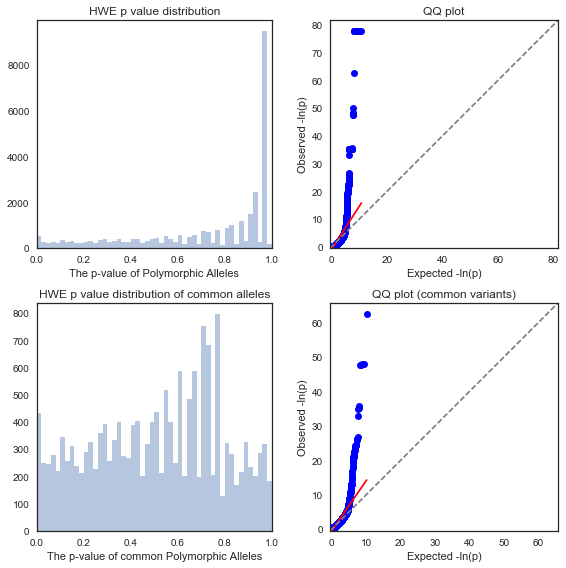

In [30]:
allele_summary_1, allele_summary_common_1, hwe_fig=hwe(allele_summary_1)

<h4 align="center">Figure 9 The Hardy-Weinberg p value distribution of data 1.</h4> 

**data 2**

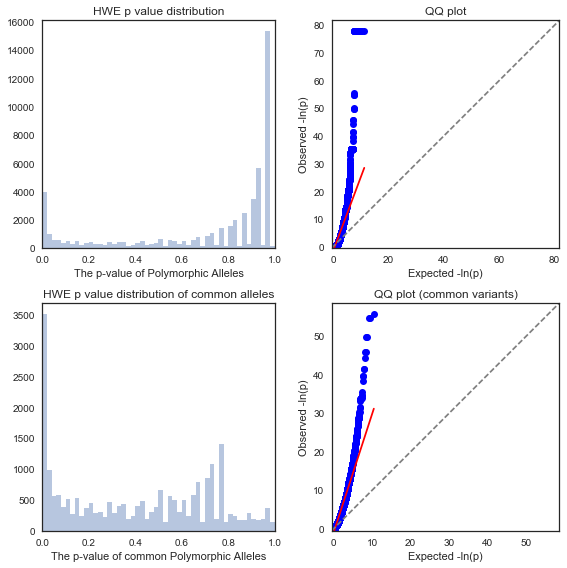

In [31]:
allele_summary_2, allele_summary_common_2, hwe_fig=hwe(allele_summary_2)

<h4 align="center">Figure 10 The Hardy-Weinberg p value distribution of data 2.</h4> 

**data 3**

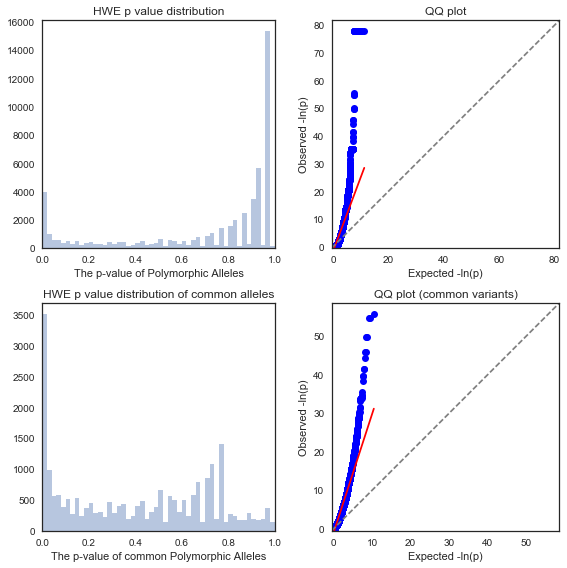

In [32]:
allele_summary_3, allele_summary_common_3, hwe_fig=hwe(allele_summary_3)

<h4 align="center">Figure 11 The Hardy-Weinberg p value distribution of data 3.</h4> 

**data 4**

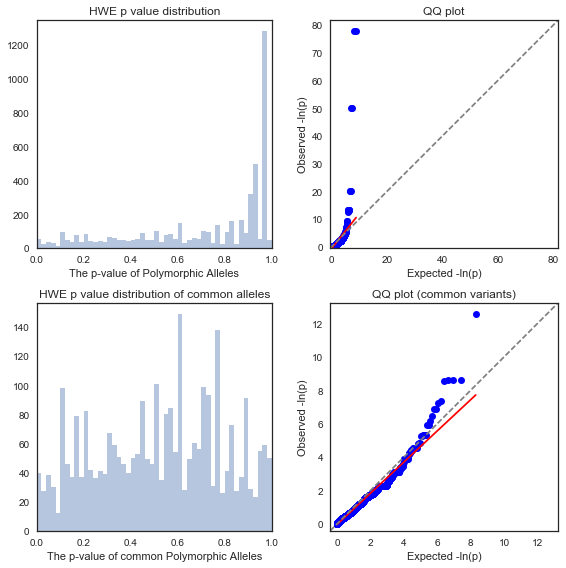

In [33]:
allele_summary_4, allele_summary_common_4, hwe_fig=hwe(allele_summary_4)

<h4 align="center">Figure 12 The Hardy-Weinberg p value distribution of data 4.</h4> 

**data 5**

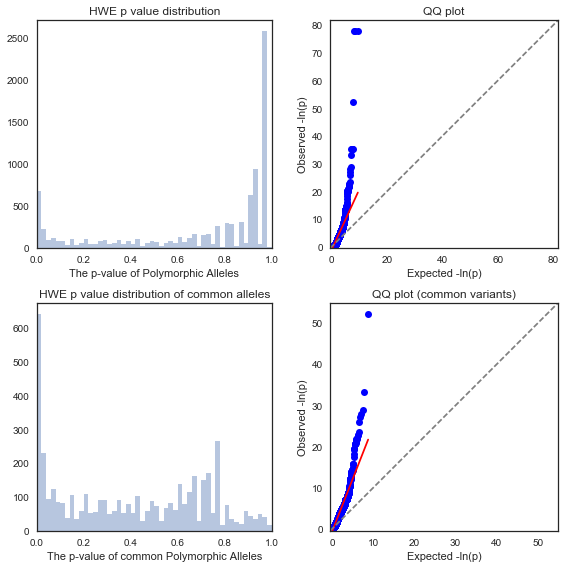

In [26]:
allele_summary_5, allele_summary_common_5, hwe_fig=hwe(allele_summary_5)

<h4 align="center">Figure 13 The Hardy-Weinberg p value distribution of data 5.</h4> 

**data 6**

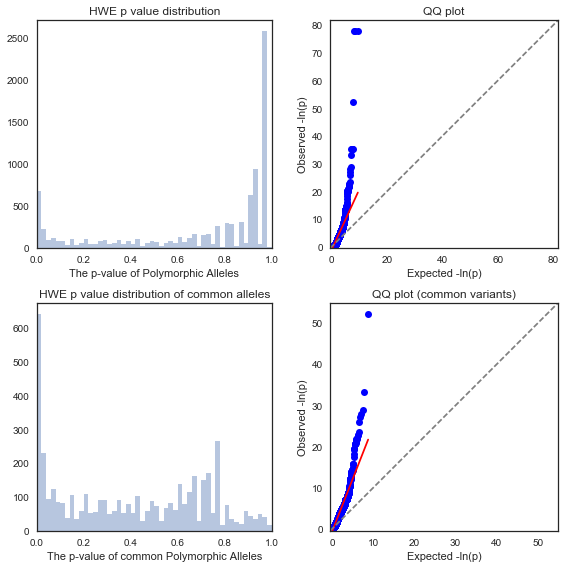

In [34]:
allele_summary_6, allele_summary_common_6, hwe_fig=hwe(allele_summary_6)

<h4 align="center">Figure 14 The Hardy-Weinberg p value distribution of data 6.</h4> 

### Linkage Disequilibrium
1. Calculate the pairwise LD among all pairs of the variants (D, D’ and R2). Store the LD in an M by M table for each of the D, D’ and R2. You need to use EM algorithm to estimate the haplotype frequencies.
2. Plot the LD in the M by M matrix for each of the LD metrics, using the same color scheme so that you can contrast different LD measurements.
3. Investigate how LD (D, D’ and R2) patterns are influenced by the allele frequency, and discuss the implication for genetic association studies.

**Answer**

**1&2**

I generated the ld table using D, D' and R2 for first 500 variants for each datasets. They are hgen_data[1-6].ld.d/dprime/r2_500.tab.

I only showed LD heatmap for dataset 6. The rest can be found in the ipython notebook or in the pdf reports of each dataset.

**3**

To investigate how LD (D, D’ and R2) patterns are influenced by the allele frequency, I sampled 100 low frequency alleles ('rare', allele frequency <0.02) and 100 common alleles ('common', allele frequency > 0.2). Note that the definition I used here is not common standard because there are very few true rare variants in these dataset and I want to seperate the allele frequencies of the two classes away.

(i) D
The rare-rare pairs and rare-common pairs have lower D absolute values compared to the common-common pairs.

(ii) D'
There no obvious difference of D' values between rare-rare pairs, rare-common pairs and common-common pairs.

(iii) R2
The rare-common pairs have lower R2 values compared to the rare-rare pairs and the common-common pairs.

In summary, the D' seems to not be greatly affected by the allele frequencies. However, both D and R2 are largely dependent on the allele frequencies. Genetic association studies often use genotyping arrays that have pre-selected SNPs and focus on common SNPs. The untyped SNPs are then inferred from tagSNPs. Because rare variants have low R2 values with tagSNPs, causal rare variants are very hard to detect in the genetic associtation studies using common SNP genotyping arrays.

In [159]:
# Pairwise haplotype estimation
# pr_hi = probability of a haplotype i

def em(total, p_h00, p_h01, p_h10, p_h11, n_unphased, n_h00_h00, n_h01_h01, n_h10_h10, n_h11_h11, n_h00_h01, n_h00_h10, 
       n_h01_h00, n_h01_h11, n_h10_h00, n_h10_h11, n_h11_h01, n_h11_h10):
         
    # E-step, calculate expectation
    p_unphased = p_h00*p_h11+p_h01*p_h10
    if p_unphased:
        n_h00 = 2*n_h00_h00 + n_h00_h01 + n_h00_h10 + n_unphased*(p_h00*p_h11/p_unphased)  
        n_h01 = 2*n_h01_h01 + n_h01_h00 + n_h01_h11 + n_unphased*(p_h01*p_h10/p_unphased)
        n_h10 = 2*n_h10_h10 + n_h10_h00 + n_h10_h11 + n_unphased*(p_h01*p_h10/p_unphased)
        n_h11 = 2*n_h11_h11 + n_h11_h01 + n_h11_h10 + n_unphased*(p_h00*p_h11/p_unphased)
    else:
        n_h00 = 2*n_h00_h00 + n_h00_h01 + n_h00_h10 
        n_h01 = 2*n_h01_h01 + n_h01_h00 + n_h01_h11 
        n_h10 = 2*n_h10_h10 + n_h10_h00 + n_h10_h11 
        n_h11 = 2*n_h11_h11 + n_h11_h01 + n_h11_h10 
        
    # M-step, gene counting
    p_h00_new = n_h00/total
    p_h01_new = n_h01/total
    p_h10_new = n_h10/total
    p_h11_new = n_h11/total
    
    return p_h00_new, p_h01_new, p_h10_new, p_h11_new
    
    
def run_em(df, a1, a2):
    
    # initialize the prob
    p_h00 = 0.25
    p_h01 = 0.25
    p_h10 = 0.25
    p_h11 = 0.25
    
    # haplotype counts
    total = 2*float(len(df))
    n_unphased = len(df[(df[a1]=='0/1')&(df[a2]=='0/1')])
    n_h00_h00 = len(df[(df[a1]=='0/0')&(df[a2]=='0/0')]) 
    n_h01_h01 = len(df[(df[a1]=='0/0')&(df[a2]=='1/1')]) 
    n_h10_h10 = len(df[(df[a1]=='1/1')&(df[a2]=='0/0')]) 
    n_h11_h11 = len(df[(df[a1]=='1/1')&(df[a2]=='1/1')]) 
    n_h00_h01 = len(df[(df[a1]=='0/0')&(df[a2]=='0/1')])                            
    n_h00_h10 = len(df[(df[a1]=='0/1')&(df[a2]=='0/0')])
    n_h01_h00 = n_h00_h01
    n_h01_h11 = len(df[(df[a1]=='0/1')&(df[a2]=='1/1')])
    n_h10_h00 = n_h00_h10
    n_h10_h11 = len(df[(df[a1]=='1/1')&(df[a2]=='0/1')])
    n_h11_h01 = n_h01_h11
    n_h11_h10 = n_h10_h11
    
    # Convergence criteria
    crit = 1e-4
    converged = False
    
    while not converged:
        p_h00_new, p_h01_new, p_h10_new, p_h11_new = em(total, p_h00, p_h01, p_h10, p_h11, n_unphased, 
                                                        n_h00_h00, n_h01_h01, n_h10_h10, n_h11_h11, 
                                                        n_h00_h01, n_h00_h10, n_h01_h00, n_h01_h11, 
                                                        n_h10_h00, n_h10_h11, n_h11_h01, n_h11_h10)
        converged = (np.abs(p_h00_new-p_h00)<crit)&(np.abs(p_h01_new-p_h01)<crit)&(np.abs(p_h10_new-p_h10)<crit)&(np.abs(p_h11_new-p_h11)<crit)
        p_h00, p_h01, p_h10, p_h11 = p_h00_new, p_h01_new, p_h10_new, p_h11_new      
    
    return p_h00, p_h01, p_h10, p_h11


def cal_ld(p_A, p_B, p_hAB):
    
    # D
    d = p_hAB - p_A*p_B
    # D'
    if d:
        if d < 0:
            dprime = d/max(-p_A*p_B, -(1-p_A)*(1-p_B))
        elif d > 0:
            dprime = d/min(p_A*(1-p_B), (1-p_A)*p_B)
        # r2
        r2 = d**2/(p_A*(1-p_A)*p_B*(1-p_B))
    else:
        dprime = r2 = 0 
    
    return {'d':d, 'dprime':dprime, 'r2':r2}


def ld_table(df, allele_summary):
            
    polymorphic_alleles = list(allele_summary[(allele_summary['Frequency of 0 allele']!=1)&(allele_summary['Frequency of 0 allele']!=0)]['Variants'])  
    ld_df_d = pd.DataFrame(index=polymorphic_alleles,columns=polymorphic_alleles, dtype=np.float64)
    ld_df_dprime = pd.DataFrame(index=polymorphic_alleles,columns=polymorphic_alleles, dtype=np.float64)
    ld_df_r2 = pd.DataFrame(index=polymorphic_alleles,columns=polymorphic_alleles, dtype=np.float64)

    for a1 in polymorphic_alleles:
        for a2 in polymorphic_alleles:
            if a1!=a2:
                p_hAB, p_hAb, p_haB, p_hab = run_em(df, a1, a2)
                p_A = p_hAB + p_hAb
                p_B = p_hAB + p_haB
            
                ld_dict = cal_ld(p_A, p_B, p_hAB)
                ld_df_d[a1][a2] = ld_df_d[a2][a1] = ld_dict['d']
                ld_df_dprime[a1][a2] = ld_df_dprime[a2][a1] = ld_dict['dprime']
                ld_df_r2[a1][a2] = ld_df_r2[a2][a1] = ld_dict['r2']
            else:
                ld_df_r2[a1][a2] = 1

    return ld_df_d, ld_df_dprime, ld_df_r2

def ld_heatmap(ld_df, metric='D'):
    
    def triu_mask(df):
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        return mask
    
    cmap = sns.light_palette('red', as_cmap=True) 
    
    fig = plt.figure(figsize=(11,9))
    mask = triu_mask(ld_df)
    plt.title(metric)
    sns.heatmap(ld_df, mask=mask, cmap=cmap, square=True, 
                linewidths=.5)
    plt.tight_layout()
    plt.close()
    
    return fig

In [48]:
ld_df_d_1, ld_df_dprime_1, ld_df_r2_1 = ld_table(df_1, allele_summary_1[:500])
ld_df_d_2, ld_df_dprime_2, ld_df_r2_2 = ld_table(df_2, allele_summary_2[:500])
ld_df_d_3, ld_df_dprime_3, ld_df_r2_3 = ld_table(df_3, allele_summary_3[:500])

In [49]:
ld_df_d_4, ld_df_dprime_4, ld_df_r2_4 = ld_table(df_4, allele_summary_4[:500])
ld_df_d_5, ld_df_dprime_5, ld_df_r2_5 = ld_table(df_5, allele_summary_5[:500])
ld_df_d_6, ld_df_dprime_6, ld_df_r2_6 = ld_table(df_6, allele_summary_4[:500])

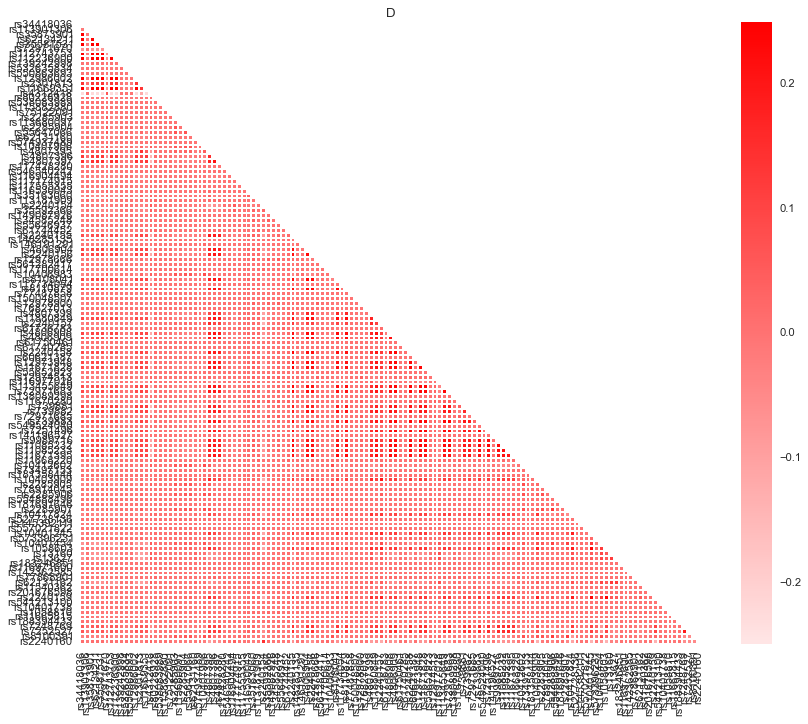

In [50]:
ld_heatmap(ld_df_d_1)

<h4 align="center">Figure 15 The LD (D) between first 500 variants of data 1.</h4> 

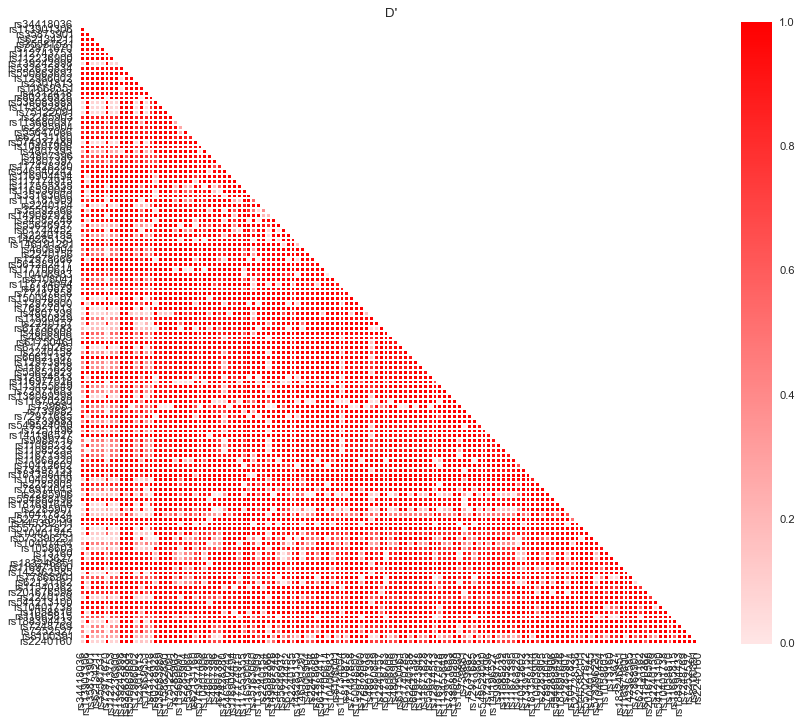

In [51]:
ld_heatmap(ld_df_dprime_1, metric="D'")

<h4 align="center">Figure 16 The LD (D') between first 500 variants of data 1.</h4> 

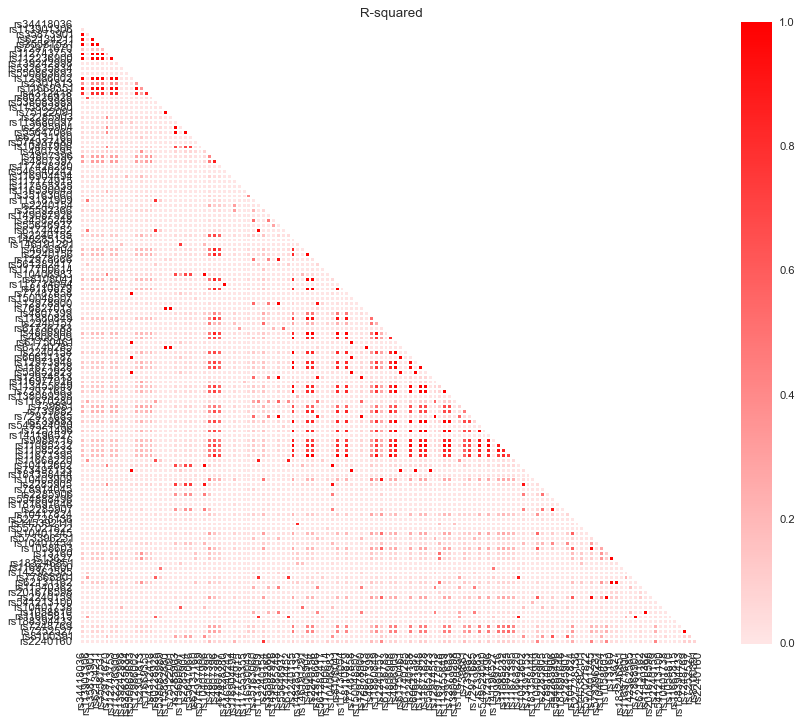

In [52]:
ld_heatmap(ld_df_r2_1, metric="R-squared")

<h4 align="center">Figure 17 The LD (R2) between first 500 variants of data 1.</h4> 

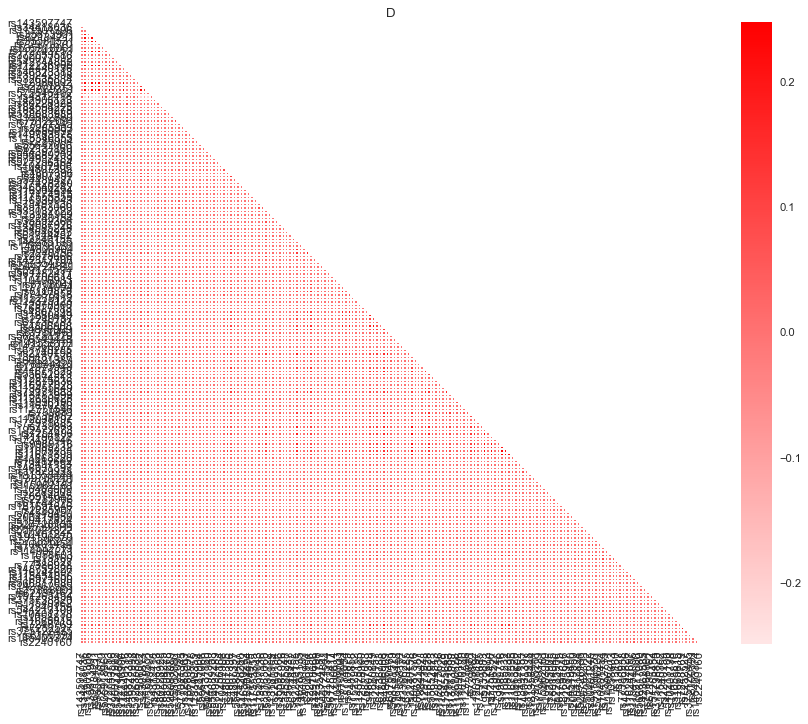

In [53]:
ld_heatmap(ld_df_d_2)

<h4 align="center">Figure 18 The LD (D) between first 500 variants of data 2.</h4> 

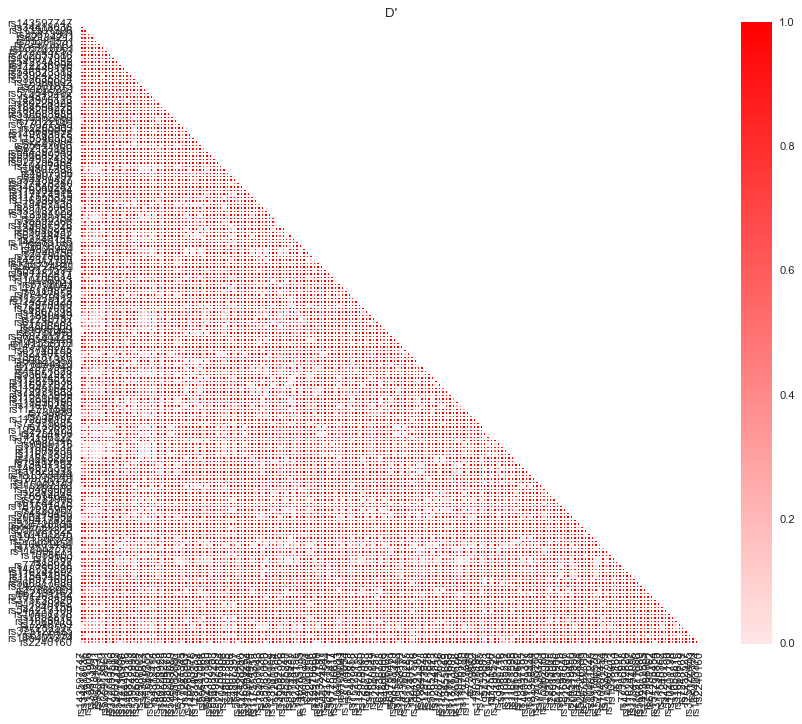

In [54]:
ld_heatmap(ld_df_dprime_2, metric="D'")

<h4 align="center">Figure 19 The LD (D') between first 500 variants of data 2.</h4> 

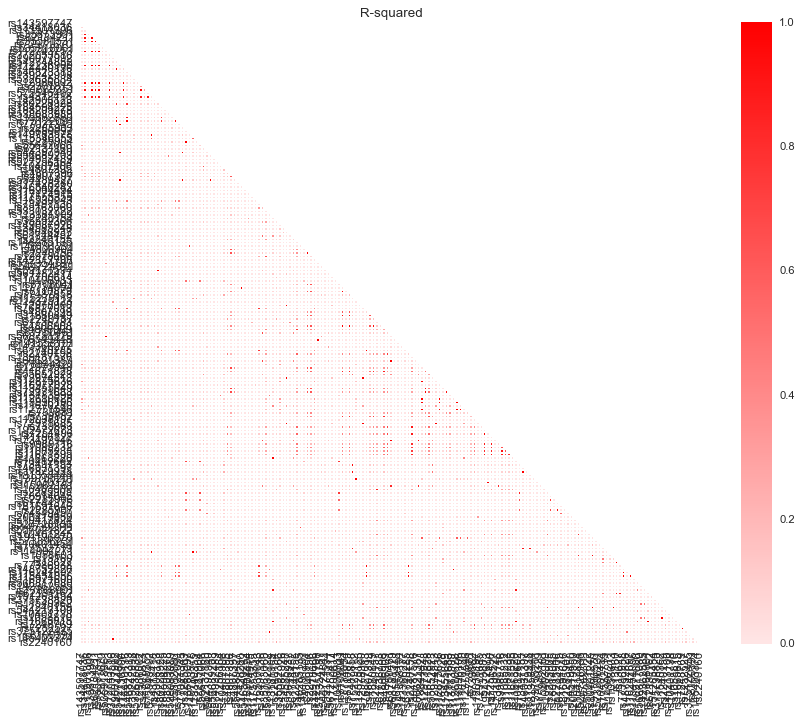

In [55]:
ld_heatmap(ld_df_r2_2, metric="R-squared")

<h4 align="center">Figure 20 The LD (R2) between first 500 variants of data 2.</h4> 

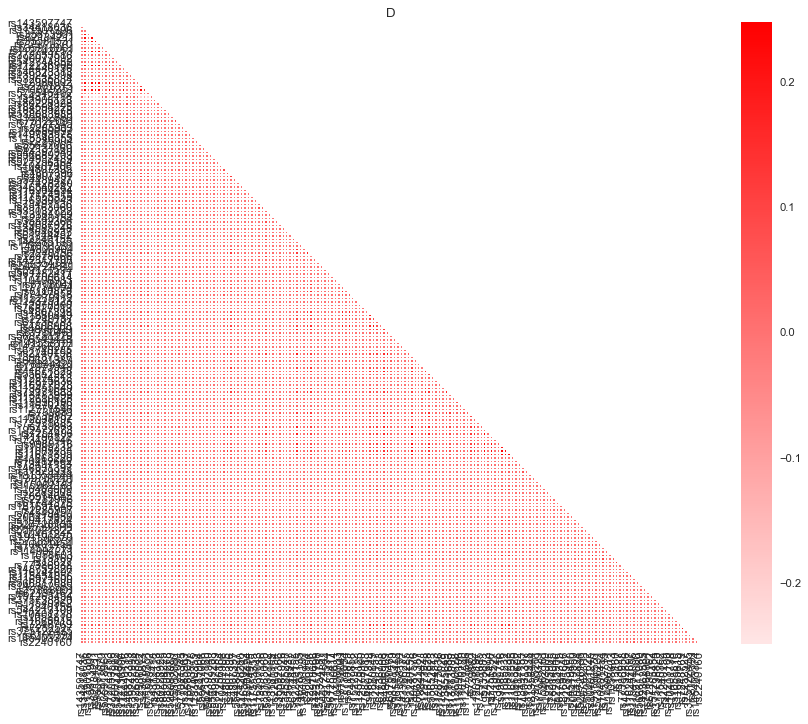

In [56]:
ld_heatmap(ld_df_d_3)

<h4 align="center">Figure 21 The LD (D) between first 500 variants of data 3.</h4> 

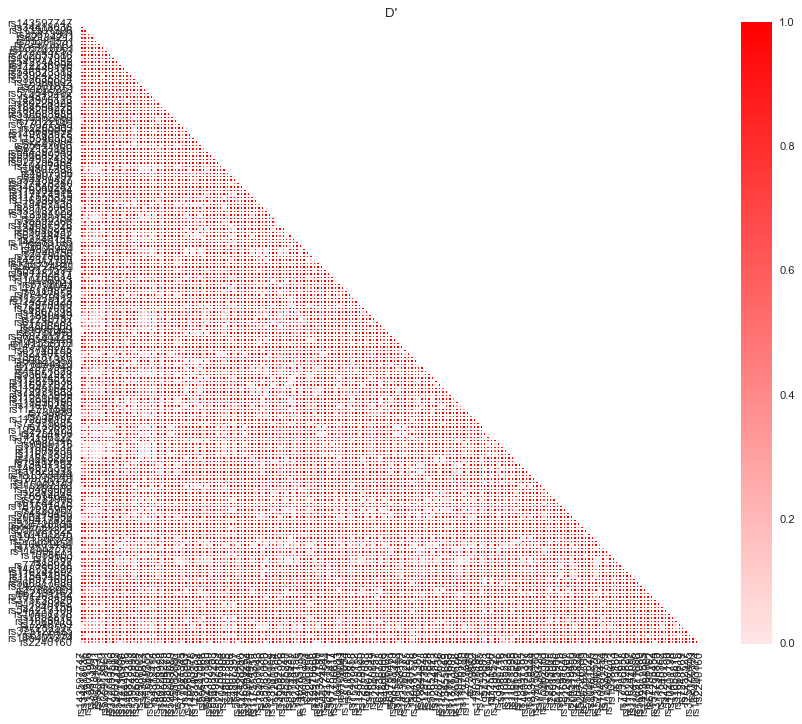

In [57]:
ld_heatmap(ld_df_dprime_3, metric="D'")

<h4 align="center">Figure 22 The LD (D') between first 500 variants of data 3.</h4> 

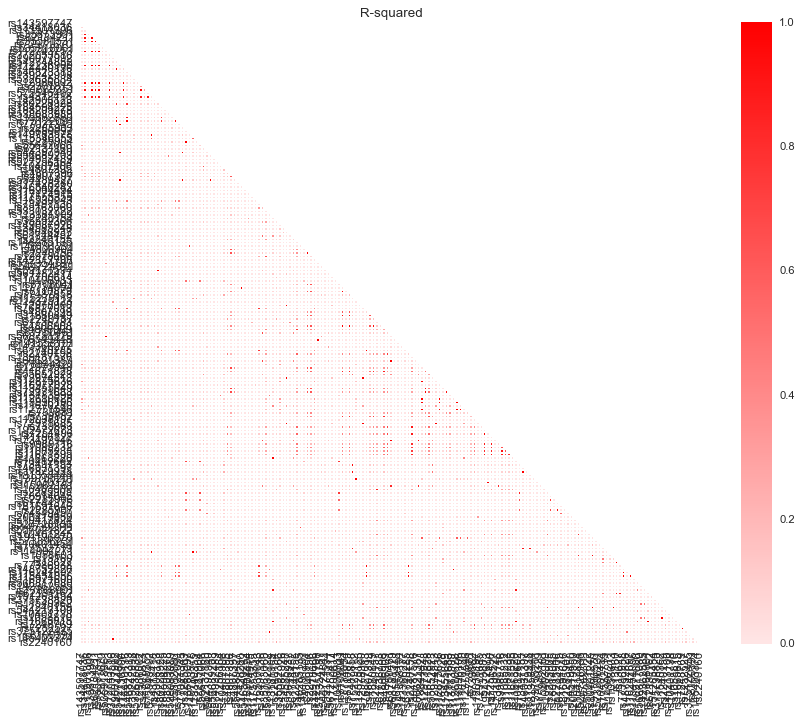

In [58]:
ld_heatmap(ld_df_r2_3, metric="R-squared")

<h4 align="center">Figure 23 The LD (R2) between first 500 variants of data 3.</h4> 

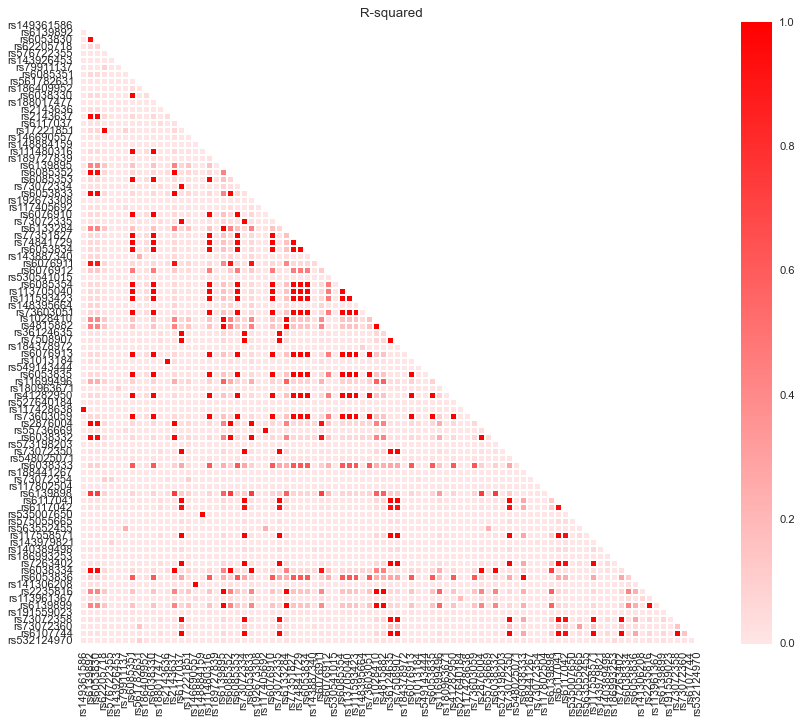

In [59]:
ld_heatmap(ld_df_r2_4, metric="R-squared")

<h4 align="center">Figure 24 The LD (D) between first 500 variants of data 4.</h4> 

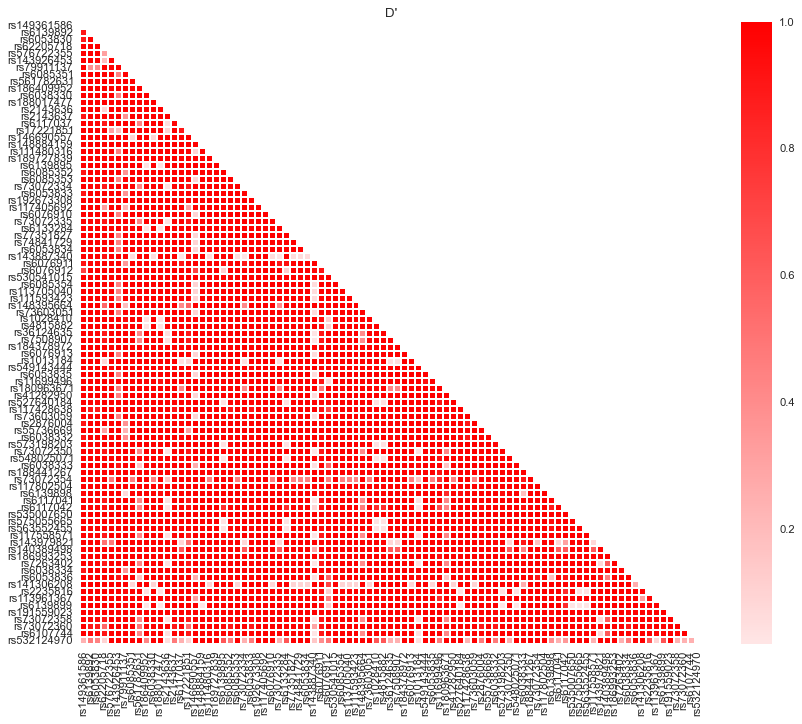

In [60]:
ld_heatmap(ld_df_dprime_4, metric="D'")

<h4 align="center">Figure 25 The LD (D') between first 500 variants of data 4.</h4> 

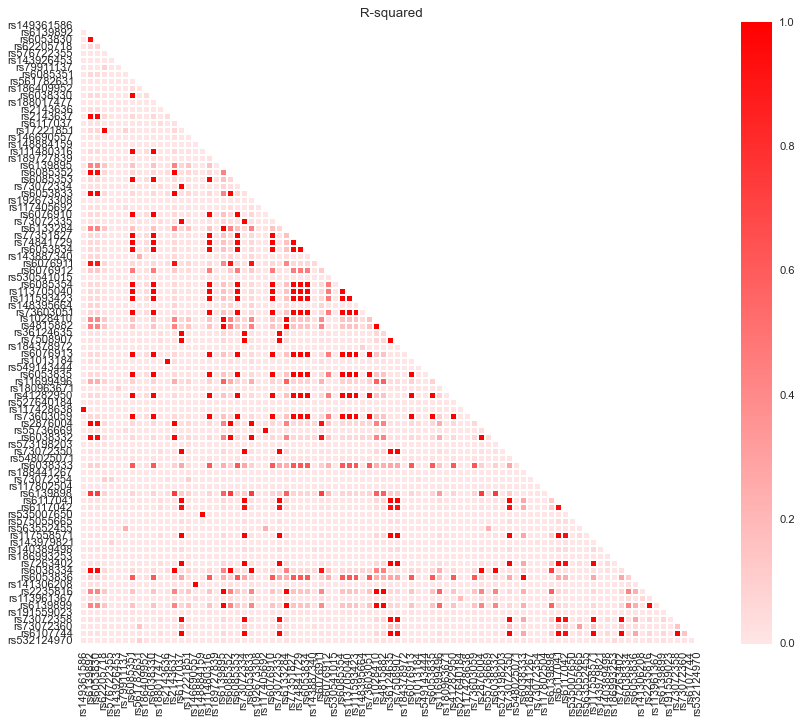

In [61]:
ld_heatmap(ld_df_r2_4, metric="R-squared")

<h4 align="center">Figure 26 The LD (R2) between first 500 variants of data 4.</h4> 

/Users/chenling/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


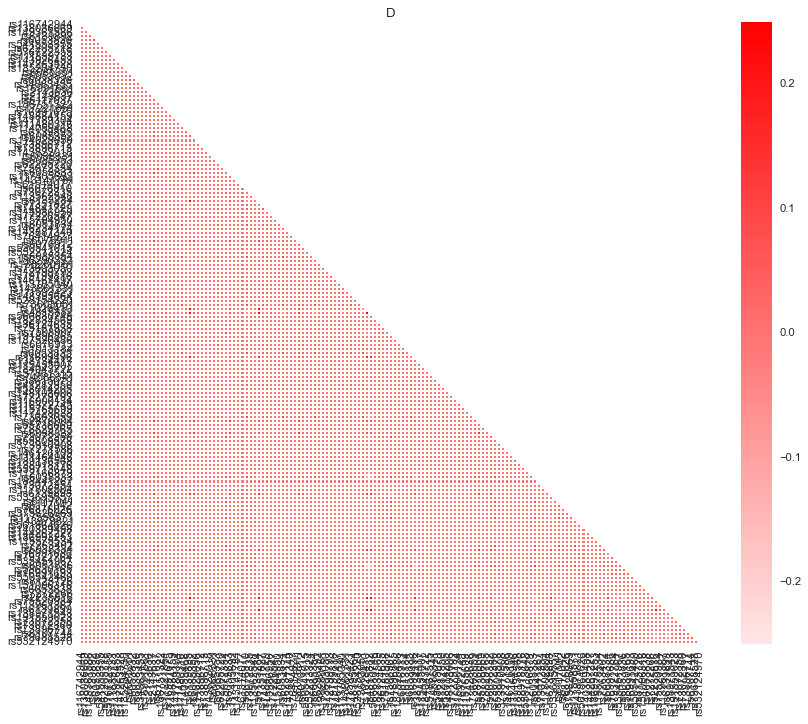

In [22]:
ld_heatmap(ld_df_d_5)

<h4 align="center">Figure 27 The LD (D) between first 500 variants of data 5.</h4> 

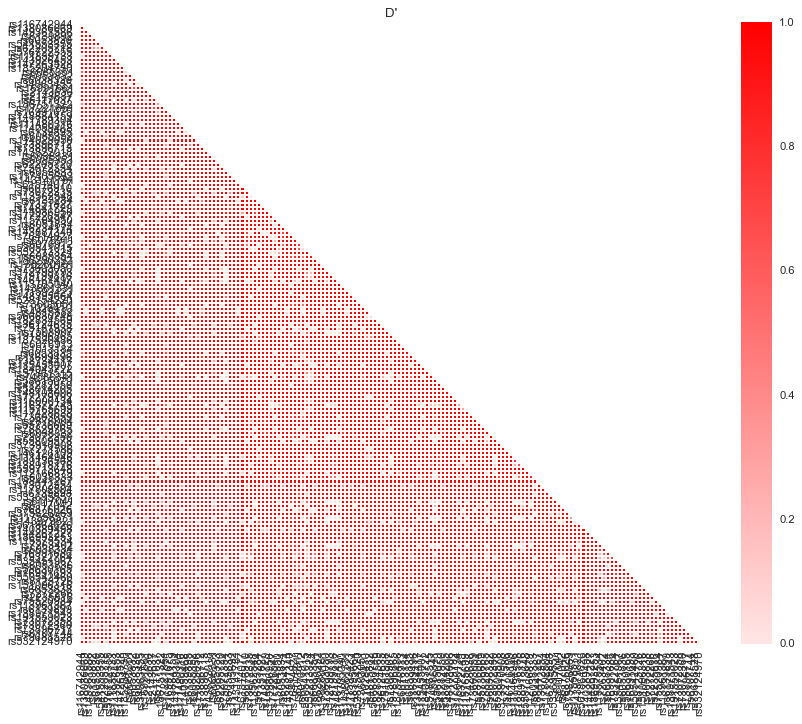

In [23]:
ld_heatmap(ld_df_dprime_5, metric="D'")

<h4 align="center">Figure 28 The LD (D') between first 500 variants of data 5.</h4> 

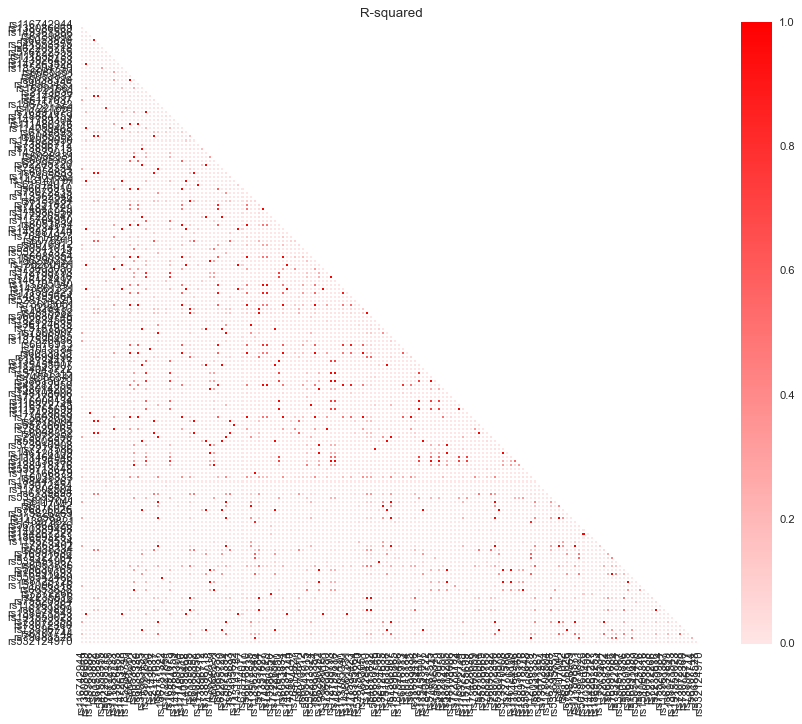

In [24]:
ld_heatmap(ld_df_r2_5, metric="R-squared")

<h4 align="center">Figure 29 The LD (R2) between first 500 variants of data 5.</h4> 

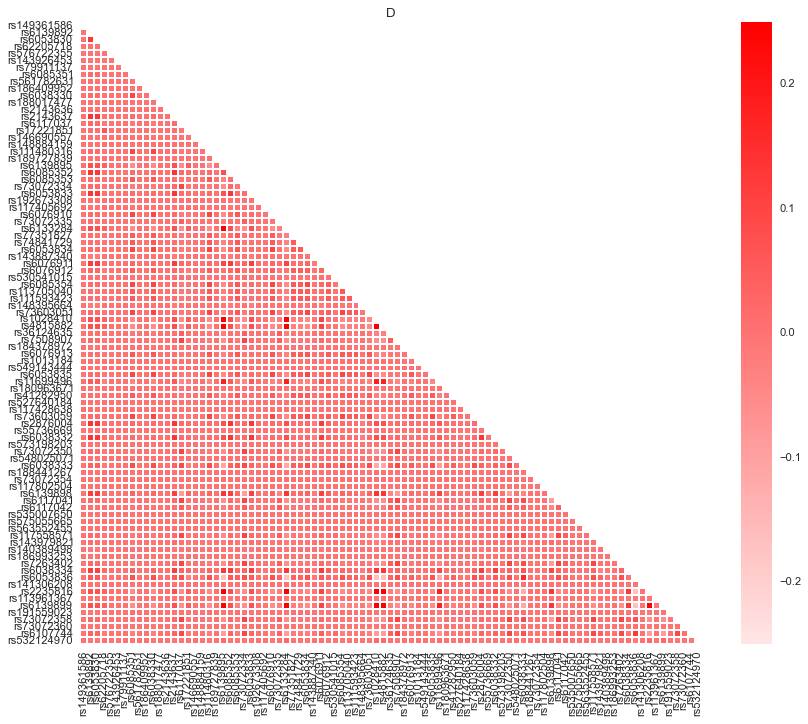

In [62]:
ld_heatmap(ld_df_d_6)

<h4 align="center">Figure 30 The LD (D) between first 500 variants of data 6.</h4> 

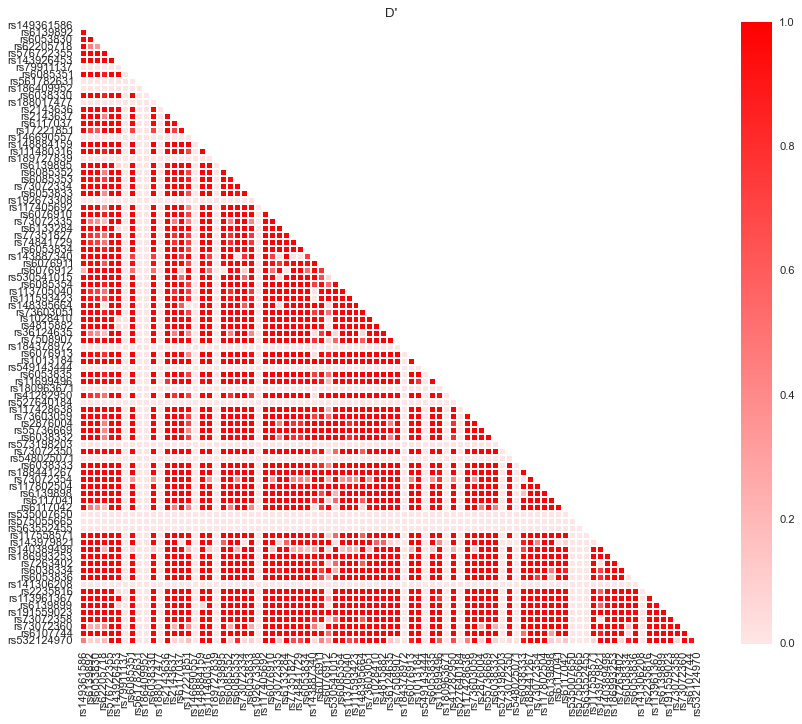

In [63]:
ld_heatmap(ld_df_dprime_6, metric="D'")

<h4 align="center">Figure 31 The LD (D') between first 500 variants of data 6.</h4> 

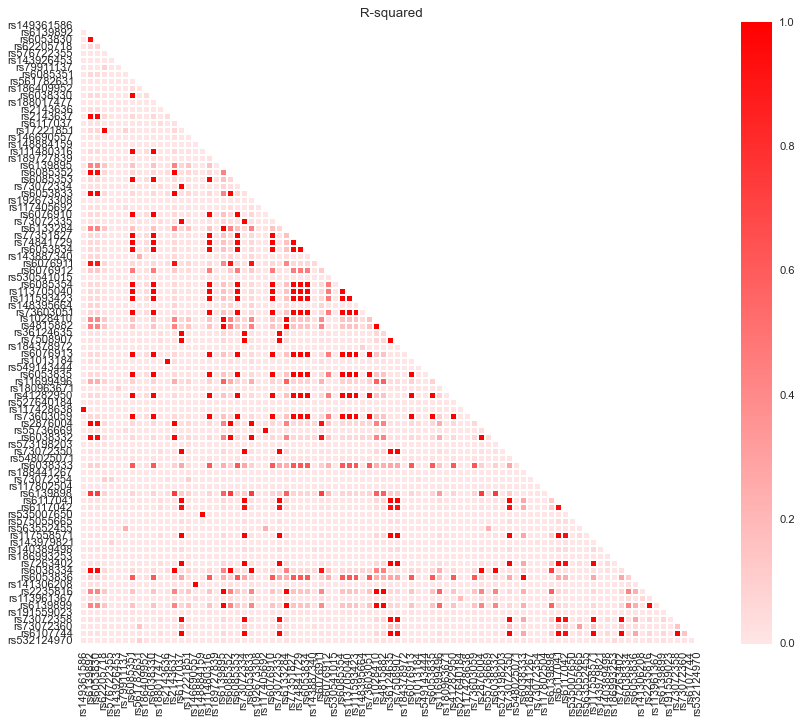

In [64]:
ld_heatmap(ld_df_r2_4, metric="R-squared")

<h4 align="center">Figure 32 The LD (R2) between first 500 variants of data 6.</h4> 

In [152]:
def ld_stratifiedby_af(rare, common, ld_df):
    
    ld_rare_rare = []
    ld_rare_common = []
    ld_common_common = []
    
    for r1 in rare:
        for r2 in rare[1:]:
            ld_rare_rare.append(ld_df[r1][r2])
        for r3 in common:
            ld_rare_common.append(ld_df[r1][r3])
            
    for r1 in common:
        for r2 in common[1:]:
            ld_common_common.append(ld_df[r1][r2])
            
    return ld_rare_rare, ld_rare_common, ld_common_common
    

def compare_rare_common_lds(df=None, allele_summary=None, ld_df_d_sample=None, ld_df_dprime_sample=None, ld_df_r2_sample=None, rare=None, common=None):
    
    condition = ld_df_d_sample and ld_df_dprime_sample and ld_df_r2_sample and rare and common
    
    if not condition:
        rare_df = allele_summary[(allele_summary['Frequency of 0 allele'] <= 0.02) & (allele_summary['Frequency of 0 allele'] > 0)]
        common_df =  allele_summary[(allele_summary['Frequency of 0 allele'] >= 0.1)&(allele_summary['Frequency of 0 allele'] <= 0.9)]
        try:
            rare_sample = rare_df.sample(100)
        except:
            rare_sample = rare_df
        common_sample = common_df.sample(100)
        allele_summary_sample = pd.concat([rare_sample, common_sample])
        ld_df_d_sample, ld_df_dprime_sample, ld_df_r2_sample = ld_table(df, allele_summary_sample)
    
        rare = rare_sample['Variants']
        common = common_sample['Variants']
    
    ld_d_rr, ld_d_rc, ld_d_cc = ld_stratifiedby_af(rare, common, ld_df_d_sample)
    ld_dp_rr, ld_dp_rc, ld_dp_cc = ld_stratifiedby_af(rare, common, ld_df_dprime_sample)
    ld_r2_rr, ld_r2_rc, ld_r2_cc = ld_stratifiedby_af(rare, common, ld_df_r2_sample)
    
    af_pair_type_d = ['rare-rare']*len(ld_d_rr) + ['rare-common']*len(ld_d_rc) + ['common-common']*len(ld_d_cc)
    ld_d = ld_d_rr + ld_d_rc + ld_d_cc
    methods_d = ['d']*len(ld_d)

    af_pair_type_dp = ['rare-rare']*len(ld_dp_rr) + ['rare-common']*len(ld_dp_rc) + ['common-common']*len(ld_dp_cc)
    ld_dp = ld_dp_rr + ld_dp_rc + ld_dp_cc
    methods_dp = ['dprime']*len(ld_dp)

    af_pair_type_r2 = ['rare-rare']*len(ld_r2_rr) + ['rare-common']*len(ld_r2_rc) + ['common-common']*len(ld_r2_cc)
    ld_r2 = ld_r2_rr + ld_r2_rc + ld_r2_cc
    methods_r2 = ['r2']*len(ld_r2)

    af_pair_type = af_pair_type_d + af_pair_type_dp + af_pair_type_r2
    lds = ld_d + ld_dp + ld_r2
    methods = methods_d + methods_dp + methods_r2

    df_ld = pd.DataFrame()
    df_ld['type'] = af_pair_type
    df_ld['lds'] = lds
    df_ld['methods'] = methods

    fig = plt.figure(figsize=(12,4))
    sns.stripplot(x="methods", y="lds", hue="type", data=df_ld, jitter=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    return ld_df_d_sample, ld_df_dprime_sample, ld_df_r2_sample, rare, common
    

extracting rare variants
27


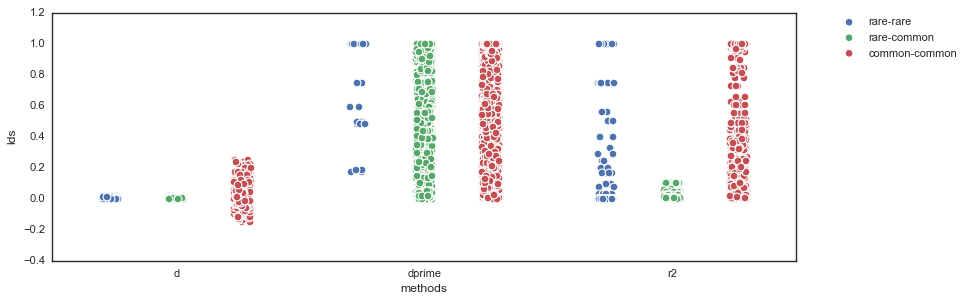

In [153]:
ld_df_d_sample, ld_df_dprime_sample, ld_df_r2_sample, rare, common = compare_rare_common_lds(df=df_5, allele_summary=allele_summary_5)

<h4 align="center">Figure 33 The allele frequency largely affects the D and r2 values.</h3> 

### Principal component analysis
1. Code the genotypes using an additive model (i.e. use 0, 1 and 2 to code 0/0, 0/1 and 1/1) and carry out PCA. Calculate the proportion of variance accounted for by the 1st, the 2nd, and the 3rd PC.
2. Plot the first two PCs of all individuals on an X-Y plot. You need to label the cases in one color and controls in another color.
3. Repeat 4.2 for PC1 vs. PC3 and PC2 vs. PC3. Which plot gives clear patterns about the pop substructure?
4. Discuss whether population substructure is a confounder or not in each of the datasets. For those datasets in which pop substructure is not a confounder discuss whether you want to use PCA to account for population substructure or not.

**Answer**

**1&2&3**

In dataset 1 and 4, there is no obvious population substructure (Figure 33 and Figure 36). So for dataset 1 and 4, the population substructure is not a coufounder for genetic association studies. 

**4**

In dataset 2,3,5 and 6 (Figure 34, 35, 37 and 38), there is population substructure. In dataset 3 and 6, there is no obvious segregation between the cases and controls. In this case, the population substructure may not be a confounder. In contrast, in dataset 2 and 5, the cases and controls are segregated, suggesting that they are from different subpopulations. In this case, the population substructure is a confounder. 

To account for the population substructure in data 2 and 5, I would include the first several PC components in the regression model that is used in the genetic association studies. I would

In [4]:
def code_genotype(df, mode='additive'):
    
    if mode=='additive':
        df = df.replace('0/0', 0)
        df = df.replace('0/1', 1)
        df = df.replace('1/1', 2)
    elif mode=='dominant':
        df = df.replace('0/0', 0)
        df = df.replace('0/1', 1)
        df = df.replace('1/1', 1)
    else: #recessive
        df = df.replace('0/0', 0)
        df = df.replace('0/1', 0)
        df = df.replace('1/1', 1)
        
    return df

def preprocess_df(df):
    
    labels = df['status']
    df = df.drop('status',axis=1).set_index('ID')
    df = df.astype(np.float64)
    df_scaled = preprocessing.scale(df, axis=0)
    
    return df_scaled, labels

def run_pca(df):
    
  # code the genotype
    df = code_genotype(df, mode='additive')
    
    # standardize the df
    df, labels = preprocess_df(df)
    
    # PCA
    pca = PCA(n_components=3)
    df_r = pca.fit(df).transform(df)
    explained_variance_ratio = pca.explained_variance_ratio_
    print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))
    pcs = pca.components_
    
    # Plot PCs
    fig = plt.figure(figsize=(12,4))
    
    color = ['navy','darkorange']
    lw=2
    
    controls = np.array(labels == 'control')
    cases = np.array(labels == 'case')
    
    # plot PC1 against PC2
    ax1 = fig.add_subplot(131) 
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.scatter(df_r[controls, 0], df_r[controls, 1], color=color[0], alpha=.8, lw=lw,
                label='control')
    ax1.scatter(df_r[cases, 0], df_r[cases, 1], color=color[1], alpha=.8, lw=lw,
                label='case')
    ax1.legend()
    
    # plot PC1 against PC3
    ax2 = fig.add_subplot(132) 
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC3')
    ax2.scatter(df_r[controls, 0], df_r[controls, 2], color=color[0], alpha=.8, lw=lw,
                label='control')
    ax2.scatter(df_r[cases, 0], df_r[cases, 2], color=color[1], alpha=.8, lw=lw,
                label='case')
    ax2.legend()
    
    
    # plot PC2 against PC3
    ax3 = fig.add_subplot(133) 
    ax3.set_xlabel('PC2')
    ax3.set_ylabel('PC3')
    ax3.scatter(df_r[controls, 1], df_r[controls, 2], color=color[0], alpha=.8, lw=lw,
                label='control')
    ax3.scatter(df_r[cases, 1], df_r[cases, 2], color=color[1], alpha=.8, lw=lw,
                label='case')
    
    ax3.legend()

    plt.tight_layout()
    
    return df_r

explained variance ratio (first three components): [ 0.01499642  0.0137269   0.01356091]


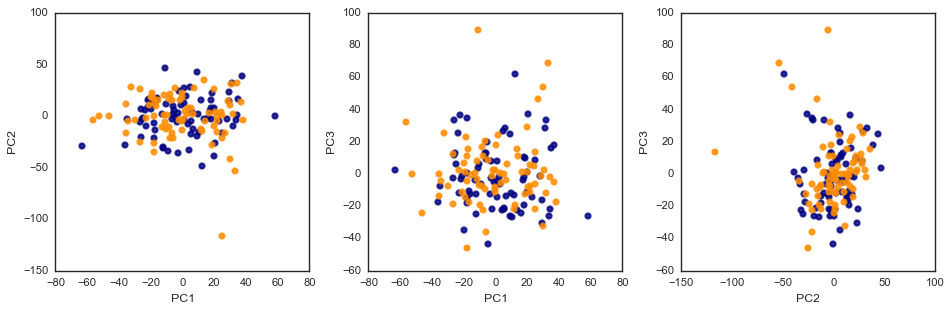

In [146]:
run_pca(df_1)

<h4 align="center">Figure 33. PCA plots of samples in data 1. Cases are in navy, controls are in dark orange.</h3> 

explained variance ratio (first three components): [ 0.05870294  0.01276577  0.01225301]


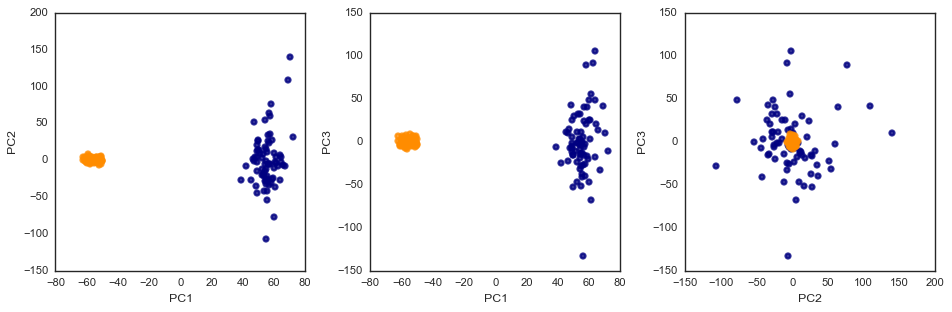

In [147]:
run_pca(df_2)

<h4 align="center">Figure 34. PCA plots of samples in data 2. Cases are in navy, controls are in dark orange.</h3> 

explained variance ratio (first three components): [ 0.05870294  0.01276577  0.01225301]


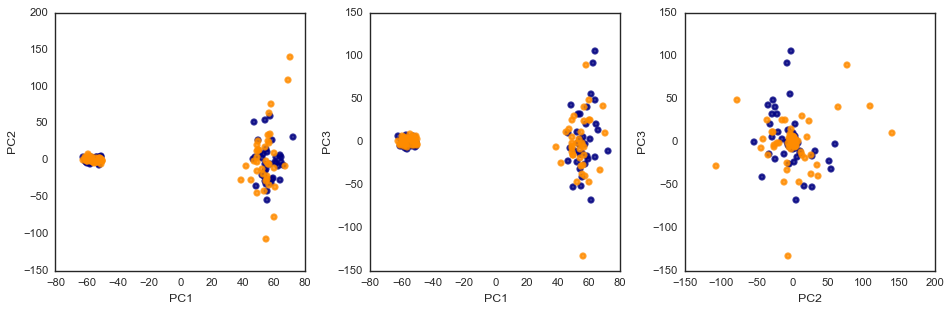

In [148]:
run_pca(df_3)

<h4 align="center">Figure 35. PCA plots of samples in data 3. Cases are in navy, controls are in dark orange.</h3> 

explained variance ratio (first three components): [ 0.06712907  0.0521619   0.04272018]


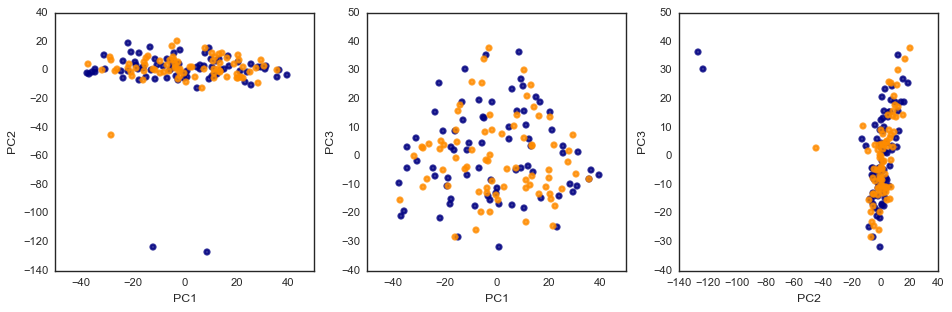

In [149]:
run_pca(df_4)

<h4 align="center">Figure 36. PCA plots of samples in data 4. Cases are in navy, controls are in dark orange.</h3> 

explained variance ratio (first three components): [ 0.07237774  0.02681926  0.02567491]


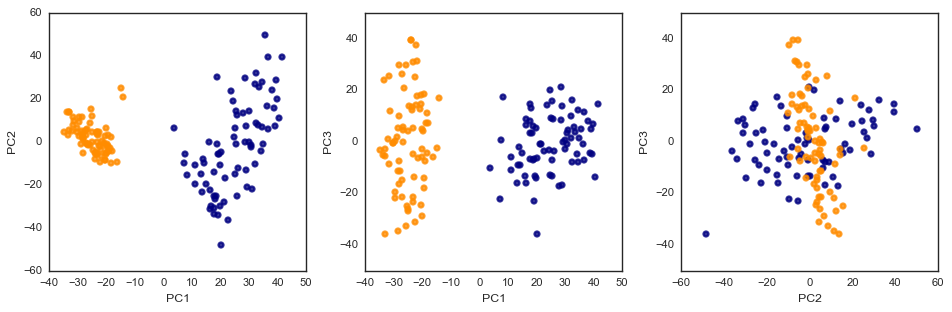

In [150]:
run_pca(df_5)

<h4 align="center">Figure 37. PCA plots of samples in data 5. Cases are in navy, controls are in dark orange.</h3> 

explained variance ratio (first three components): [ 0.07237774  0.02681926  0.02567491]


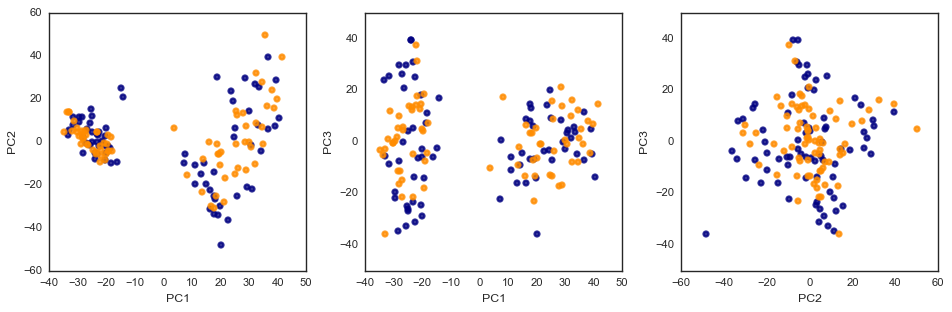

In [151]:
run_pca(df_6)

<h4 align="center">Figure 38. PCA plots of samples in data 6. Cases are in navy, controls are in dark orange.</h3> 

#### Subpopulation membership of each individual 
For datasets that you suspect have population substructure based on the plots in 4), develop a Gibbs sampler to infer the memberships of all samples. You may decide the number of substructures based on your visual inspection of the PCA plots. Output the membership of each individual with the marginal probability of being in the assigned substructure based on your Gibbs sampler results.

In [47]:
from numpy.random import dirichlet
from numpy.random import choice

def init_gibbs(df, allele_summary, K=3):  
    
    # calculate the Pkl based on the subpopulation membership
    # Only use common polymorphic alleles
    polymorphic_alleles = list(allele_summary[(allele_summary['Frequency of 0 allele']>=0.02)&(allele_summary['Frequency of 0 allele']<=0.98)]['Variants'])  
    df = df.ix[:, ['ID']+polymorphic_alleles] #only keep polymorphic snps
    df =code_genotype(df)
    
    # initiate the subpopulation membership equally
    z=[]
    for i in range(K):
        z+=((len(df)/K)*[i])
    z+=(len(df)-len(z))*[K]
    
    df['subpop'] = z
    
    grped = df.groupby('subpop')
    
    return polymorphic_alleles, df

def update_z(K, polymorphic_alleles, subpop_dict, df):
    
    new_zs = []
   
    for df_index, row in df.iterrows():
        
        # prx_ks = [prx_pop0, prx_pop1]
        prx_ks = [1]*K

        for a in polymorphic_alleles:
            genotype = row[a]
                
            # prx_ks = [1:prx_pop0, 2:prx_pop1]
            # prx_pop0 *= prx_pop0_l
            # prx_pop0_1
                       
            for k in range(K):
                p_0 = subpop_dict[k][a][0]
                p_1 = subpop_dict[k][a][1]
                
                if genotype == 0: 
                    prx_popk_a = p_0**2
                elif genotype == 1:      
                    prx_popk_a = 2*p_0*p_1
                elif genotype == 2: 
                    prx_popk_a = p_1**2
                
                # update prx for allele a based on gentype of allele a
                prx_popk = prx_ks[k]
                prx_popk *= prx_popk_a
                prx_ks[k] = prx_popk 
       
        prx_sum = sum(prx_ks)
        pr_z = [i/prx_sum for i in prx_ks]
        # According to the probability, sample the subpop membership
        new_k = choice(K, 1, p=pr_z)[0]
        
        new_zs.append(new_k)
    
    new_df = df
    new_df['subpop'] = new_zs
    
    return new_df

def update_subpop_dict(new_df, K, polymorphic_alleles):
    
    # update subpop_dict = {pop1:{Psnp1=[p_0,p_1], ...}, pop2: ...}
    subpop_dict={}
    grped = new_df.groupby('subpop')
    
    for k in range(K):
        Pkl_dict = {}
        
        try:
            grp = grped.get_group(k)       
            for a in polymorphic_alleles:
                t = grp[a].value_counts().to_frame()
                try:
                    zeros = t[a][0]
                except:
                    zeros = 0
                try:
                    ones = t[a][1]
                except:
                    ones = 0
                try:
                    twos = t[a][2]
                except:
                    twos = 0
                    
                n_zero = 2*zeros + ones
                n_one = ones + 2*twos
            
                #sample prior probility of pkl from dirichlet
                Pkl_dict[a] = dirichlet([1+n_zero, 1+n_one], size=1)[0]
        
        except KeyError:
            # random ps for not-seen populations
            for a in polymorphic_alleles:
                Pkl_dict[a] = dirichlet([1, 1], size=1)[0]
                        
        subpop_dict[k] = Pkl_dict
    
    return subpop_dict

def run_gibbs(df, allele_summary, K=3, rounds=5000, plot_p_history=True, plot_zlikelihood_history=True):
   
    polymorphic_alleles, df = init_gibbs(df, allele_summary, K)
    zs = list(df['subpop'])
    zs_all =[zs]
    
    stable = False
    n = 0
    
    if plot_p_history:
        # plot 0 allele frequency history during sampling of a random set of alleles (5) of subpopulation 1
        alleles_to_plt = choice(polymorphic_alleles, 5)
        colors = ['b','g','r','c','m']
        fig = plt.figure(figsize=(20,4))
        ax1 = fig.add_subplot(151)
        ax2 = fig.add_subplot(152)
        ax3 = fig.add_subplot(153)
        ax4 = fig.add_subplot(154)
        ax5 = fig.add_subplot(155)
    
    subpop_dict = update_subpop_dict(new_df=df, K=K, polymorphic_alleles=polymorphic_alleles)
    while not stable:
               
        new_subpop_dict = update_subpop_dict(new_df=df, K=K, polymorphic_alleles=polymorphic_alleles)
        new_df = update_z(K=K, polymorphic_alleles=polymorphic_alleles, subpop_dict=new_subpop_dict, df=df)
        new_zs = list(new_df['subpop'])     
       
        df=new_df
        subpop_dict=new_subpop_dict
        zs = new_zs
        zs_all.append(zs)
        
        if plot_p_history:
            ax1.scatter(n, subpop_dict[1][alleles_to_plt[0]][0], c=colors[0], s=12)
            ax2.scatter(n, subpop_dict[1][alleles_to_plt[1]][0], c=colors[1], s=12) 
            ax3.scatter(n, subpop_dict[1][alleles_to_plt[2]][0], c=colors[2], s=12)
            ax4.scatter(n, subpop_dict[1][alleles_to_plt[3]][0], c=colors[3], s=12) 
            ax5.scatter(n, subpop_dict[1][alleles_to_plt[4]][0], c=colors[4], s=12) 
                
        n+=1
        
        if n%100 ==0:
            print 'Round %s'%(n)
        if n > rounds :
            stable = True
    
    plt.legend()
    plt.show()
            
    return zs_all, subpop_dict, df

def compute_pr_z(zs_all, df, final_frac=0.2):
    from scipy.stats import mode
    
    after_burn_in = int(-len(zs_all)*final_frac)
    final_zs = np.array(zs_all[after_burn_in:]).T

    pr_zs =[]
    memberships = []
    for z in final_zs: 
        membership = mode(z)[0][0]
        counts = (z == membership).sum()
        pr_z = float(counts)/len(z)
        pr_zs.append(pr_z)
        memberships.append(membership)
    
    df['final membership'] = memberships
    df['Probability of membership'] = pr_zs
    
    return df

def validate_gibbs(df_r, df_gibbs, K=2):
    memberships = df_gibbs['final membership']
    
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    lw=1
    colors = ['orange', 'blue']
    
    for k, color in zip(range(K), colors[:K]):
        members_in_k = np.array(memberships==(k))
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        
        ax1.scatter(df_r[members_in_k, 0], df_r[members_in_k, 1], color=color, alpha=.7, lw=lw,
                label='%s'%(k))
        ax1.legend()
        
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC3')
        ax2.scatter(df_r[members_in_k, 0], df_r[members_in_k, 2], color=color, alpha=.7, lw=lw,
                label='%s'%(k))
        ax2.legend()
        
        ax3.set_xlabel('PC2')
        ax3.set_ylabel('PC3')
        ax3.scatter(df_r[members_in_k, 1], df_r[members_in_k, 2], color=color, alpha=.7, lw=lw,
                label='%s'%(k))
        
        ax3.legend()
        
    plt.tight_layout()            
    plt.show()

In [ ]:
zs_new, subpop_dict_new, df_new = run_gibbs(df_5, allele_summary_5[:1000], K=2, rounds=200, plot_p_history=True)

In [57]:
df_new = compute_pr_z(zs_new, df_5, final_frac=0.5)

In [58]:
df_new['final membership'].value_counts()

0    87
1    63
Name: final membership, dtype: int64

** Validation **
Map to PC componenets to see if the submembership assignment match the PCA results

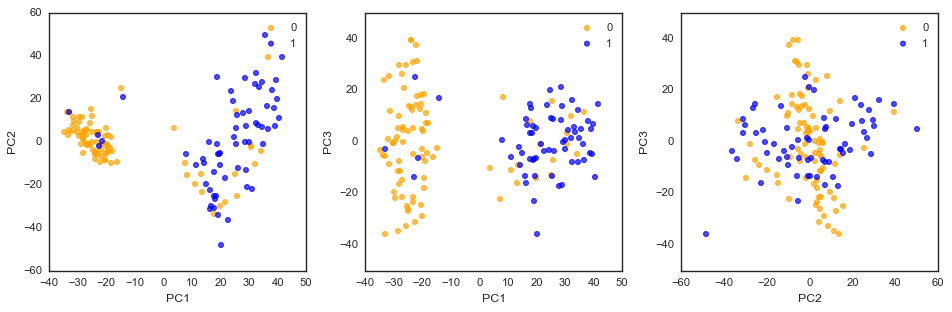

In [60]:
validate_gibbs(df_r, df_new, K=2)

explained variance ratio (first three components): [ 0.07239466  0.02681733  0.02567214]


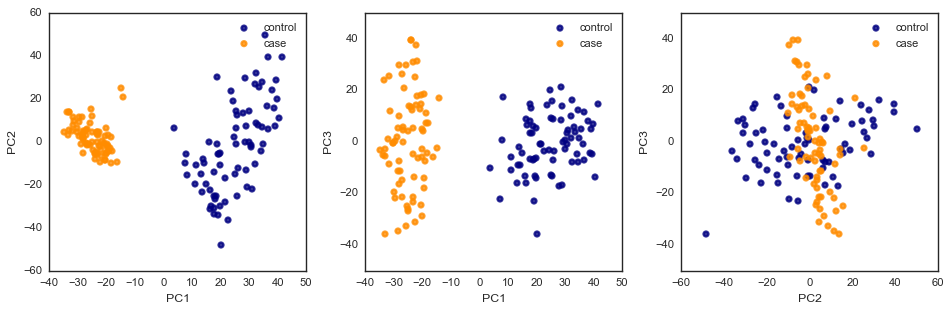

In [30]:
df_r = run_pca(df_5)